In [5]:
 %matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [6]:
#ml 전과정 정리. 

In [7]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target[:3]

array(['5', '0', '4'], dtype=object)

In [8]:
type(mnist)

sklearn.utils.Bunch

In [9]:
mnist.keys

<function Bunch.keys>

In [10]:
mnist_df=pd.read_csv("../csv-data/mnist.csv")
mnist_df

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
mnist_df.shape

(70000, 785)

In [12]:
target=mnist.target

In [13]:
X_train,X_test, y_train, y_test= mnist_df[:60000],mnist_df[60000:],target[:60000],target[60000:]

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
#SGD:확률적으로 제일 가능성이 높은선을 구분선으로 정하는 방법.

In [16]:
#모델을 선정했으면 객체를 생성하자. 

sgd_clf=SGDClassifier()

In [17]:
#훈련데이터로 공부시키자!
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
sgd_clf.score(X_train, y_train)

0.871

In [19]:
#검증데이터로 검증해보자!
result= sgd_clf.predict(X_test)

In [20]:
#실제데이터로 판별해보자~
from sklearn.metrics import accuracy_score
accuracy_jumsu=accuracy_score(y_test, result)
accuracy_jumsu

0.78

In [21]:
#훈련용 데이터 점수, 검증용 데이터 점수비교해보아야함
#훈련용점수 == 검증용 점수, 일반화하기 괜찮음
# 훈련용 점수>검증용 점수 .... 훈련용문제에 최적화되어있어 다른문제를 못푼다. 
#훈련용 점수<검증용 점수 .... 다양한 문제유형을 풀수 있는 모델이기때문에 모델로 적합하다. 
# 한 set의 데이터로 일반화하면 안된다. 여러 데이터를 넣었을대 유사한 결과가 나와야 일반적으로 사용할수있는 모델로 채택

In [22]:
##훈련데이터와  검증용 데이터를 임의의 비율로 섞어서 다시 공부시키기. > 정확도 계산

In [23]:
X_train,X_test, y_train, y_test= mnist_df[:50000],mnist_df[50000:],target[:50000],target[50000:]

In [24]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
sgd_clf.score(X_train, y_train)

0.84042

In [26]:
result= sgd_clf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_jumsu=accuracy_score(y_test, result)
accuracy_jumsu

0.6747

In [28]:
train_df1 = mnist_df[:12345]
train_df2 = mnist_df[22345:30000]
train_df3 = mnist_df[40000:]

In [29]:
train_df = train_df1.append(train_df2, ignore_index=True)
train_df.shape

(20000, 785)

In [30]:
train_df = train_df.append(train_df3, ignore_index=True)
train_df.shape

(50000, 785)

In [31]:
train_df1_target = target[:12345]
train_df2_target = target[22345:30000]
train_df3_target = target[40000:]

In [32]:
train_df_target = []

In [33]:
train_df_target.extend(train_df1_target)

In [34]:
train_df_target.extend(train_df2_target)
train_df_target.extend(train_df3_target)

In [35]:
len(train_df_target)

50000

In [36]:
test_df1 = mnist_df[12345:22345]
test_df2 = mnist_df[30000:40000]

In [37]:
test_df = test_df1.append(test_df2, ignore_index=True)
test_df.shape

(20000, 785)

In [38]:
test_df_target = []

In [39]:
test_df1_target = target[12345:22345]
test_df2_target = target[30000:40000]

In [40]:
test_df_target.extend(test_df1_target)
test_df_target.extend(test_df2_target)

In [41]:
X_train,X_test, y_train, y_test= train_df, test_df, train_df_target,test_df_target

In [42]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
sgd_clf.score(X_train, y_train)

0.86154

In [44]:
result= sgd_clf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
accuracy_jumsu=accuracy_score(y_test, result)
accuracy_jumsu

0.88055

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
acc=[]
score=[]
for i in range(5,50,5):
    tree_clf=DecisionTreeClassifier(max_depth=i,  random_state=42 )
    X_train,X_test, y_train, y_test = train_test_split(mnist['data'], target,test_size=0.2, random_state=100)
    tree_clf.fit(X_train,  y_train)
    tree_clf.score(X_train, y_train)
    com_target=tree_clf.predict(X_test)
    print(i,":", tree_clf.score(X_train, y_train))
    print(i,":",accuracy_score(y_test, com_target))
    
    score.append(tree_clf.score(X_train, y_train))
    acc.append(accuracy_score(y_test, com_target))

5 : 0.6828571428571428
5 : 0.6909285714285714
10 : 0.8996428571428572
10 : 0.859
15 : 0.9819821428571428
15 : 0.8767142857142857
20 : 0.9932142857142857
20 : 0.8747142857142857
25 : 0.9963928571428572
25 : 0.8732857142857143
30 : 0.9975892857142857
30 : 0.8737857142857143
35 : 0.9987142857142857
35 : 0.869
40 : 0.9994821428571429
40 : 0.8724285714285714
45 : 0.9998035714285715
45 : 0.8710714285714286


In [88]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
#X_train, X_test, y_train, y_test
X_train,X_test, y_train, y_test = train_test_split(mnist['data'], target,test_size=0.2, random_state=100)
#훈련문제, 검증문제, 훈련답, 검증답

In [90]:
tree_clf.fit(X_train,  y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [96]:
y_test.shape

(14000,)

In [97]:
com_target=tree_clf.predict(X_test)

In [98]:
com_target[:5]#컴퓨터가 푼 답안지. 

array(['3', '1', '6', '5', '9'], dtype=object)

In [99]:
accuracy_score(y_test, com_target)

0.8704285714285714

In [100]:
accuracy_score(y_test, com_target)

0.8704285714285714

(0.67, 1.0)

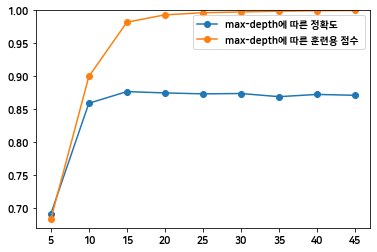

In [75]:
plt.plot(range(5,50,5), acc, marker='o', label='max-depth에 따른 정확도')
plt.plot(range(5,50,5), score, marker='o', label='max-depth에 따른 훈련용 점수 ')
plt.legend()
plt.ylim([0.67,1.0])  

([<matplotlib.axis.XTick at 0x27a44fa9e08>,
 <a list of 4 Text xticklabel objects>)

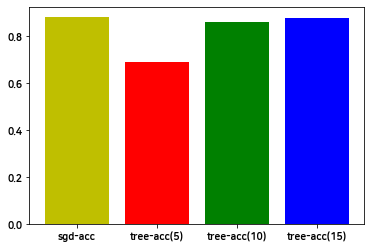

In [76]:
index=['sgd-acc','tree-acc(5)','tree-acc(10)','tree-acc(15)']
x=np.arange(4)
values=[accuracy_jumsu, acc[0], acc[1], acc[2]]
plt.bar(x, values, color=['y','r','g','b'])
plt.xticks(x, index)